# Statistische kwaliteitscontrole

![quality](quality.jpg)

## Situatie

De firma Glow BV produceert lampen.

- Bekend is dat **2%** van de productie defecten bevat
- De dagproductie bestaat uit **75.000 lampen**

## Opdracht

- Onderzoek hoeveel kapotte lampen je tegenkomt als je **25 lampen** uit de totale dagproductie inspecteert
- Voer de inspectie **10 maal** uit
- Maak een kort overzicht van je bevindingen (in Excel, met MatplotLib of met print-statements)

Begin met de analyse hieronder.

In [2]:
import random
# random.sample() #Returns a given sample of a sequence
# random.shuffle() #Takes a sequence and returns the sequence in a random order

In [3]:
# 1. Genereer een lijst met functionele lampen (hoeveel?)

daily_output = 75000
defect_rate = 0.02

functional_lamps = [0] * int((1-defect_rate)*daily_output)
print(len(functional_lamps))


# 2. Vul de lijst aan met defecte lampen (hoeveel?)
defect_lamps = [1]*int(defect_rate*daily_output)
print(len(defect_lamps))

total_lamps = functional_lamps + defect_lamps
print(len(total_lamps))

73500
1500
75000


In [4]:
def sample(count):
    mysample =  random.sample(total_lamps,count)
    return mysample

In [5]:
epochs = 1000
sample_size = 25
sample_results = []

# sample with replacement
for i in range(epochs): 

    defects_detected = sample(sample_size).count(1)
    sample_results.append(defects_detected)

total_sample_defects = sum(i > 0 for i in sample_results)
print(total_sample_defects/(epochs*sample_size))

0.0154


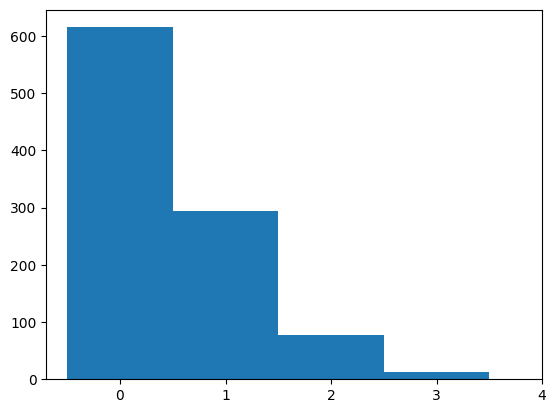

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# the trick is to set up the bins centered on the integers, i.e.
# -0.5, 0.5, 1,5, 2.5, ... up to max(data) + 1.5. Then you substract -0.5 to
# eliminate the extra bin at the end.
bins = np.arange(0, 3 + 1.5) - 0.5
# then you plot away
fig, ax = plt.subplots()
_ = ax.hist(sample_results, bins)
ax.set_xticks(bins + 0.5)

In [7]:
mylist = [1,2,3,4,5,6]
mysample = random.sample(mylist,2)
print(mysample)

[4, 3]


In [8]:
inmylist = mylist.index(mysample[0])
print(inmylist)

3


In [9]:
inmylist = []
for item in range(len(mysample)):
    inmylist.append(mylist.index(mysample[item]))

print(inmylist)

[3, 2]


In [10]:
def remove_items_by_index(lst, indices):
    #indices.sort(reverse=True)
    
    for index in indices:
        lst.pop(index)
    
    return lst


In [11]:
my_new_list = remove_items_by_index(mylist, inmylist)
print(my_new_list)

[1, 2, 5, 6]


In [12]:
# sample without replacement
batch = total_lamps

def sample_noreplacement(count):
    inmylist = []
    mysample = random.sample(batch,count)

    for item in range(len(mysample)):
        inmylist.append(mysample.index(mysample[item]))
        
    for index in inmylist:
        batch.pop(index)

    return mysample


In [13]:
epochs = 1000
sample_size = 25
sample_results = []

# sample with replacement
for i in range(epochs): 

    defects_detected = sample_noreplacement(sample_size).count(1)
    sample_results.append(defects_detected)

In [14]:
total_sample_defects = sum(i > 0 for i in sample_results)
print(total_sample_defects/(epochs*sample_size))

0.01844


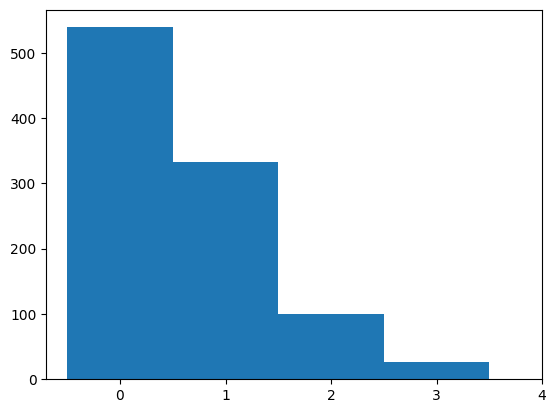

In [15]:
bins = np.arange(0, 3 + 1.5) - 0.5
# then you plot away
fig, ax = plt.subplots()
_ = ax.hist(sample_results, bins)
ax.set_xticks(bins + 0.5)

## Stap 4: reflecteren

1. (a) Komt het gemiddelde van je inspectie overeen met de daadwerkelijke productiefout?

   (b) Zo nee: hoeveel inspecties moet je dan doen om in de buurt te komen van de 2%?

2. (a) Is het verstandig om kosten te drukken en maar 5 inspecties uit te voeren?

   (b) Of per inspectie slechts 15 lampen te onderzoeken?

3. (a) Maakt het uit of je de lampen na inspectie terugstopt in de batch?

   (b) Kun je dit aantonen met je simulatie?

In [26]:
inspection_size_results = []
inspectionmaxsize = 10

for q in range(1,inspectionmaxsize):
    inspections = q
    sample_size = 25
    sample_results = []

    # sample with replacement
    for i in range(inspections): 

        defects_detected = sample(sample_size).count(1)
        sample_results.append(defects_detected)

    total_sample_defects = sum(i > 0 for i in sample_results)
    inspection_size_results.append(total_sample_defects/(q*sample_size))


ValueError: Sample larger than population or is negative

In [18]:
print(inspection_size_results)

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.008888888888888889, 0.009, 0.01, 0.01, 0.009230769230769232, 0.01, 0.01, 0.01, 0.01, 0.009444444444444445, 0.01, 0.009, 0.01, 0.01, 0.009565217391304347, 0.009166666666666667, 0.01, 0.01, 0.009259259259259259, 0.008928571428571428, 0.009310344827586206, 0.009666666666666667, 0.00967741935483871, 0.00875, 0.009696969696969697, 0.009411764705882352, 0.009428571428571429, 0.009166666666666667, 0.01, 0.009473684210526316, 0.01, 0.0095, 0.00951219512195122, 0.009761904761904762, 0.009302325581395349, 0.00909090909090909, 0.009777777777777778, 0.008695652173913044, 0.009148936170212766, 0.009166666666666667, 0.008775510204081632, 0.009, 0.009607843137254901, 0.009807692307692307, 0.009811320754716982, 0.009444444444444445, 0.01, 0.009821428571428571, 0.01, 0.009827586206896551, 0.009322033898305085, 0.009666666666666667, 0.009180327868852459, 0.00935483870967742, 0.009841269841269842, 0.00921875, 0.008923076923076922, 0.009545454545454546, 0

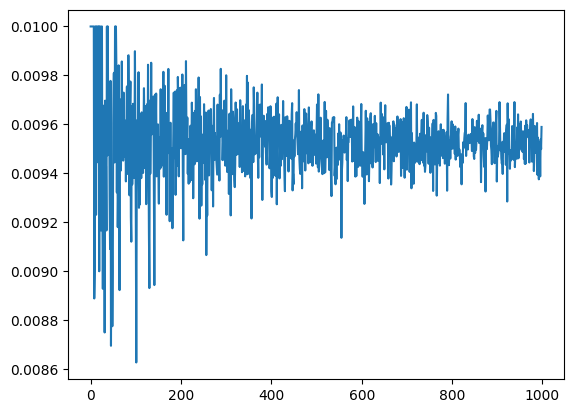

In [19]:
plt.plot(inspection_size_results)

## Extra: variatie in productiefout

De aanname is dat 2% van de productie defecten bevat, maar dit is slechts een **gemiddelde** is. Soms is het 3% dan weer 2% of zelfs 5%. De productiefout hangt namelijk weer af van de productiefout in de onderdelen waaruit de lamp is opgebouwd.

- Breid je model uit waarin je de productiefout laat varieren met 1%
- Maak dit voor de inspectie uit?

In [ ]:
# Uitbreiding

# ...

## Extra: Bayesiaanse statistiek

In de bijlage vind je een csv bestand met daarin een onbekend aantal lampen waarvan er een aantal stuk zijn.

1. Lees het bestand in en achterhaal met een aantal inspecties wat het percentage defecte lampen moet zijn

2. Controleer daarna of dit juist was door de totale lijst met lampen te analyseren

Bovenstaande is een voorbeeld van Baysiaanse statistiek.